In [4]:
%load_ext autoreload
%autoreload 2

from src import *
import matplotlib.pyplot as plt

In [14]:
N = 100
p = 4

mean = np.zeros(p)
A = np.random.randn(p, p)
cov_matrix = A @ A.T

# Simulate data

In [51]:
def simulate_dat(N = 100, p = 5, q = 5, dependence = True) :
    mean = np.zeros(p)
    A = np.random.randn(p, p)
    cov_matrix = A @ A.T
    X = np.random.multivariate_normal(mean, cov_matrix, N)
        
    if dependence:
        A = np.random.rand(p, q) # generate some dependence
        Y = X @ A
    else:
        A = np.random.randn(q, q)
        cov_matrix = A @ A.T
        mean = np.zeros(q)
        Y = np.random.multivariate_normal(mean, cov_matrix, N)
    return X, Y

In [6]:
X, Y = simulate_dat()

In [41]:
K = gaussian_kernel_matrix(X, 2)
L = gaussian_kernel_matrix(Y, 2)

In [42]:
HSIC_test(K, L)

0.024345237655115592

In [43]:
HSIC_test2(K, L)

0.024345237655115502

In [44]:
def test_using_HSIC(X, Y, hsic_func):
    K = gaussian_kernel_matrix(X, 2)
    L = gaussian_kernel_matrix(Y, 2)
    return hsic_func(K, L)

# Test with dependence

In [54]:
res = [test_using_HSIC(*simulate_dat(), hsic_func=HSIC_test) for _ in range(1000)]

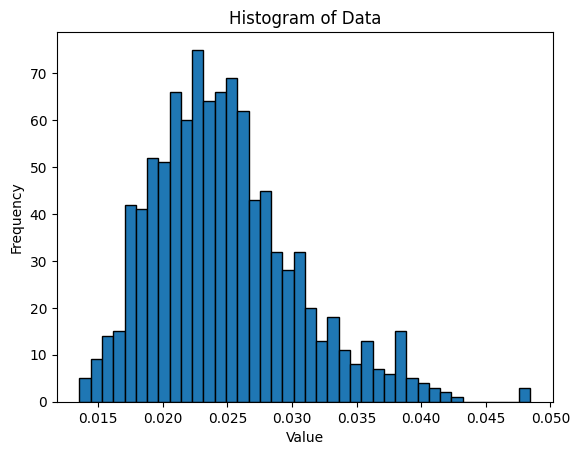

In [55]:
plt.hist(res, bins=40, edgecolor='black')  # `bins` specifies the number of intervals
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Test with no dependence

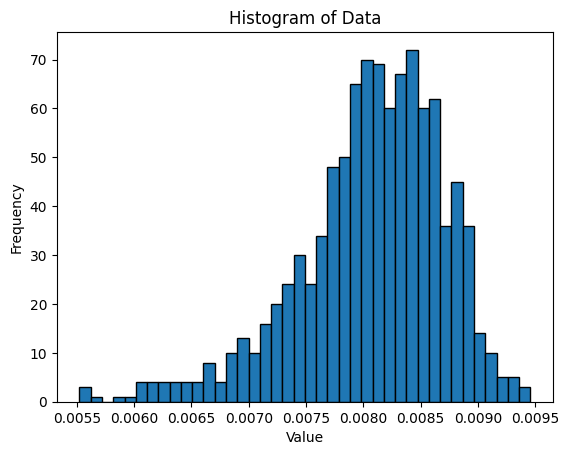

In [56]:
res_nodep = [test_using_HSIC(*simulate_dat(dependence=False), hsic_func=HSIC_test) for _ in range(1000)]
plt.hist(res_nodep, bins=40, edgecolor='black')  # `bins` specifies the number of intervals
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Permutation test

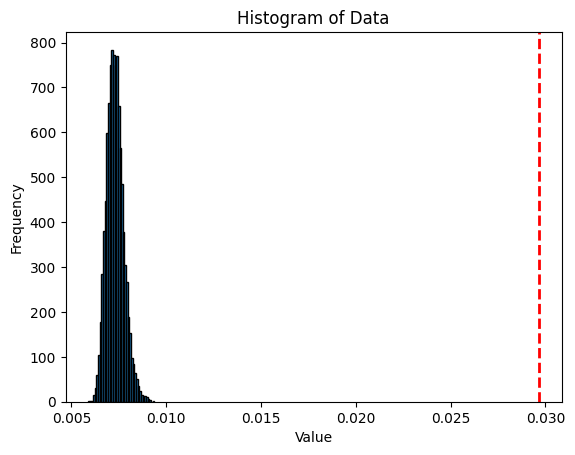

In [67]:
X, Y = simulate_dat()
permutation_res = [test_using_HSIC(X, Y[np.random.permutation(np.arange(0, N)), :], hsic_func=HSIC_test) for _ in
                   range(10000)]
T = test_using_HSIC(X, Y, hsic_func=HSIC_test)
plt.hist(permutation_res, bins=40, edgecolor='black')  # `bins` specifies the number of intervals
plt.axvline(x=T, color='red', linestyle='--', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Permutation no dependence

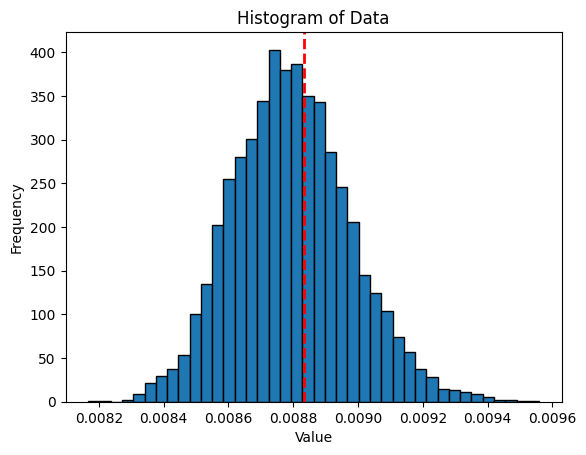

In [66]:
X, Y = simulate_dat(dependence=False)
permutation_res_nodep = [test_using_HSIC(X, Y[np.random.permutation(np.arange(0, N)), :], hsic_func=HSIC_test) for _ in
                   range(5000)]
T = test_using_HSIC(X, Y, hsic_func=HSIC_test)
plt.hist(permutation_res_nodep, bins=40, edgecolor='black')  # `bins` specifies the number of intervals
plt.axvline(x=T, color='red', linestyle='--', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()